In [4]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [27]:
data_dir = 'data/bangla_sentiment.csv'
df = pd.read_csv(data_dir)
df.sample(5)

,label,text
21,neg,ভারত তোমরা আমাদের নামের বন্ধু প্রকৃত বন্ধু নও ...
39,neg,ভারতের ৪০% জনগণ এখনও খোলা জায়গায় টয়লেট করে এর ...
7,pos,আশা ছিল আমাদের ও জাতীয় দল খেলুক।কিন্তু আজ ও বি...
11,neg,"মনে হচ্ছে,পশ্চিমবঙ্গবাসীর খুব জ্বলছে?"
22,pos,যখনই শুনেছি পরীক্ষা অস্ট্রেলিয়ার ব্রিসবেন এ হব...


<Axes: xlabel='label', ylabel='count'>

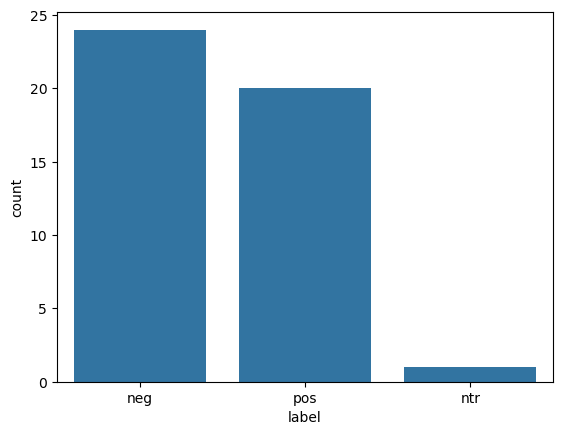

In [28]:
label_count = df['label'].value_counts().reset_index()
sns.barplot(x = 'label' , y = 'count', data=label_count)

remove unknown label

<Axes: xlabel='label', ylabel='count'>

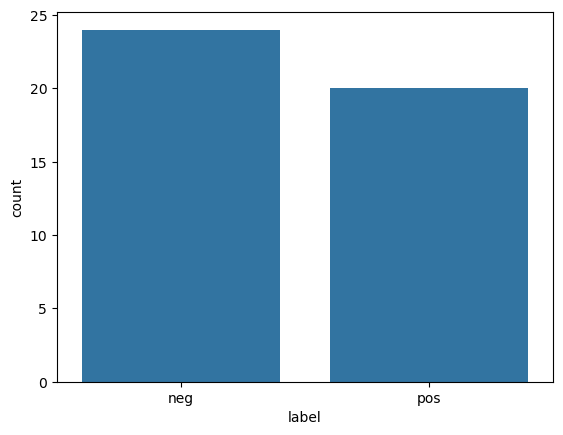

In [29]:
df = df[df['label'] != 'ntr']
label_count = df['label'].value_counts().reset_index()
sns.barplot(x = 'label' , y = 'count', data=label_count)

ordinal encoding

In [30]:
df['label_encoded'] = df['label'].map({'neg': 0, 'pos': 1})

In [31]:
df.sample(8)

,label,text,label_encoded
10,neg,ফালতু,0
6,pos,অভিনন্দন বাংলাদেশের গর্ব।দোয়া করি এমন ভাবেই তো...,1
34,pos,hats off to the gentleman.. একজন টাইগার ভক্তের...,1
44,pos,তাসকিন কে রাখার জন্য ধন্যবাদ।,1
24,neg,খুশি হওয়ার কিছু নাই৷ ICC এ ৱকম সিদ্ধান্ত নিবে ...,0
18,neg,শুনে এত্তগুলান ভাল্লাগছে ☺ কিন্তু যে জানোয়ারের...,0
26,pos,আলহামদুলিল্লাহ খবরটা শুনে ভাল লাগলো।বিসিবি দল ...,1
8,pos,এটা আমাদের বাংলাদেশের গর্ব সাবাস বাই মোস্তাফিজ,1


For practice purpose, I am skipping the preprocessing part, like remove stop words, punctuations, stem, lemmatization etc.

In [50]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'].tolist()).toarray()
y = df['label_encoded'].tolist()
y

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1]

In [51]:
y = torch.tensor(y).float().unsqueeze(1)
X = torch.tensor(X).float()
X, y

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.]]))

Now making our model

In [57]:
class BagOfWords(nn.Module):
    def __init__(self, inputDim):
        super(BagOfWords, self).__init__()
        self.fc1 = nn.Linear(inputDim, inputDim*2)
        self.fc2 = nn.Linear(inputDim*2, inputDim)
        self.out = nn.Linear(inputDim, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.out(x))
        return x


In [63]:
row, col = X.shape
model = BagOfWords(col)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [59]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0045, -0.0197,  0.0658,  ..., -0.0431,  0.0457, -0.0312],
                      [ 0.0024,  0.0538, -0.0160,  ..., -0.0015, -0.0424, -0.0175],
                      [-0.0141, -0.0344, -0.0468,  ...,  0.0108, -0.0044, -0.0417],
                      ...,
                      [-0.0151, -0.0150, -0.0082,  ...,  0.0671,  0.0639, -0.0222],
                      [-0.0188, -0.0238, -0.0527,  ..., -0.0517, -0.0423,  0.0037],
                      [-0.0447,  0.0191, -0.0069,  ..., -0.0572, -0.0005,  0.0159]])),
             ('fc1.bias',
              tensor([-0.0341,  0.0380, -0.0453,  0.0275, -0.0012, -0.0265,  0.0368,  0.0443,
                       0.0257, -0.0217, -0.0148, -0.0588, -0.0409, -0.0041,  0.0645, -0.0338,
                       0.0474,  0.0494, -0.0664,  0.0176, -0.0654, -0.0383,  0.0124, -0.0481,
                       0.0340, -0.0138,  0.0185,  0.0392, -0.0472, -0.0360, -0.0103,  0.0065,
                       0.0302,  0.06

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
Y_train

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.]])

In [64]:
for epoch in range(100):
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 20, Loss: 0.0017
Epoch 40, Loss: 0.0004
Epoch 60, Loss: 0.0002
Epoch 80, Loss: 0.0001
Epoch 100, Loss: 0.0001


In [72]:
with torch.no_grad():
    outputs = model(X_test).round()
    print((outputs == Y_test))
    print("Result : ", outputs.view(-1).tolist())
    print("Actual : ", Y_test.view(-1).tolist())


tensor([[False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False]])
Result :  [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
Actual :  [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
